In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6172 entries, 5961 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          6172 non-null   int64  
 1   Name          6172 non-null   object 
 2   Platform      6172 non-null   object 
 3   Year          6172 non-null   int64  
 4   Genre         6172 non-null   object 
 5   Publisher     6172 non-null   object 
 6   NA_Sales      6172 non-null   float64
 7   EU_Sales      6172 non-null   float64
 8   JP_Sales      6172 non-null   float64
 9   Other_Sales   6172 non-null   float64
 10  Global_Sales  6172 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 578.6+ KB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.0,6172.000000,6172.000000
mean,11445.360823,2006.477317,0.066573,0.023075,0.0,0.006423,0.096894
std,2796.030326,4.773696,0.055980,0.023513,0.0,0.006844,0.067850
min,5963.000000,1980.000000,0.000000,0.000000,0.0,0.000000,0.010000
25%,9156.750000,2003.000000,0.020000,0.000000,0.0,0.000000,0.040000
50%,11396.500000,2007.000000,0.060000,0.020000,0.0,0.010000,0.080000
75%,13746.750000,2010.000000,0.100000,0.040000,0.0,0.010000,0.140000
max,16600.000000,2016.000000,0.220000,0.100000,0.0,0.020000,0.290000


In [ ]:
# Data cleaning and outlier detection

if df.duplicated().any():
    df.drop_duplicates(inplace=True)

df['Year'] = df['Year'].astype(int)

numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[condition]

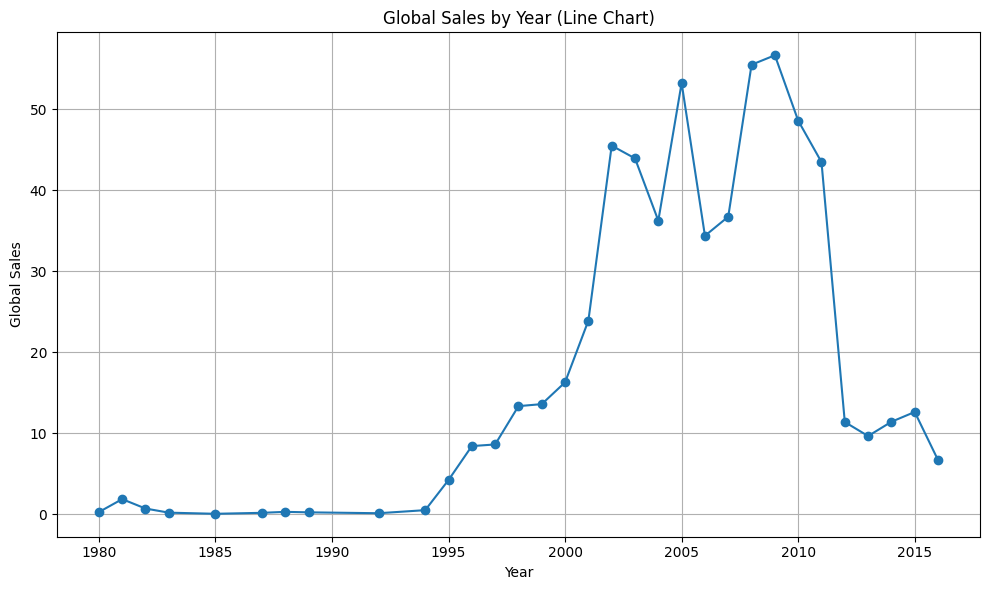

In [ ]:
# Line Chart
plt.figure(figsize=(10,6))
df.groupby('Year')['Global_Sales'].sum().plot(kind='line', marker='o')
plt.title("Global Sales by Year (Line Chart)")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
print('\n\n\n')

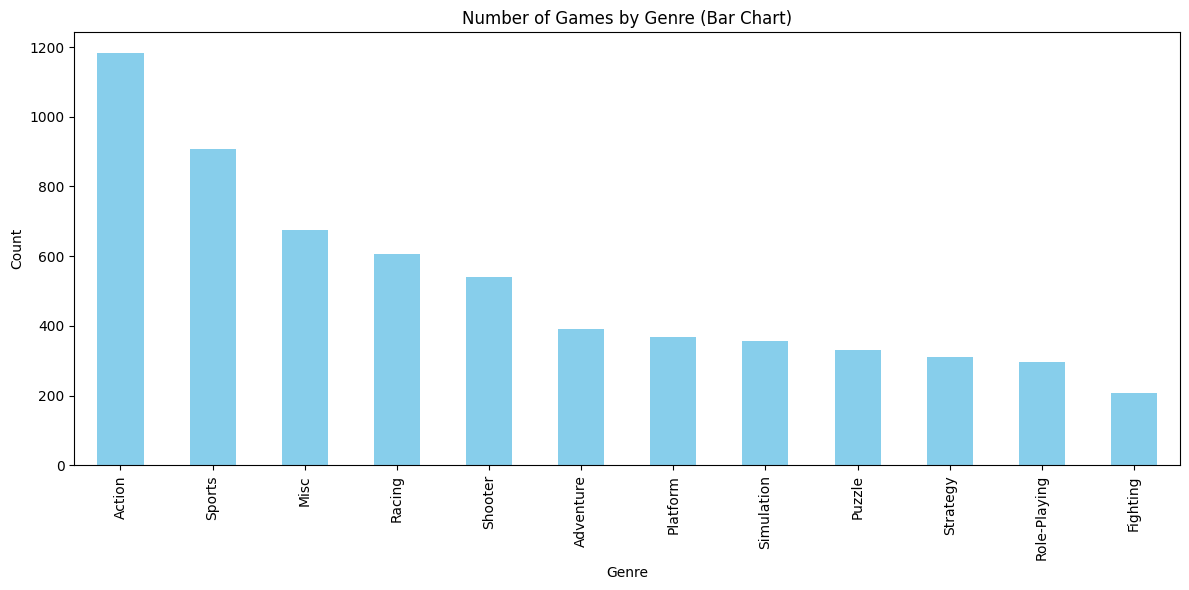

In [ ]:
# Bar Chart
plt.figure(figsize=(12,6))
df['Genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Games by Genre (Bar Chart)")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print('\n\n\n')

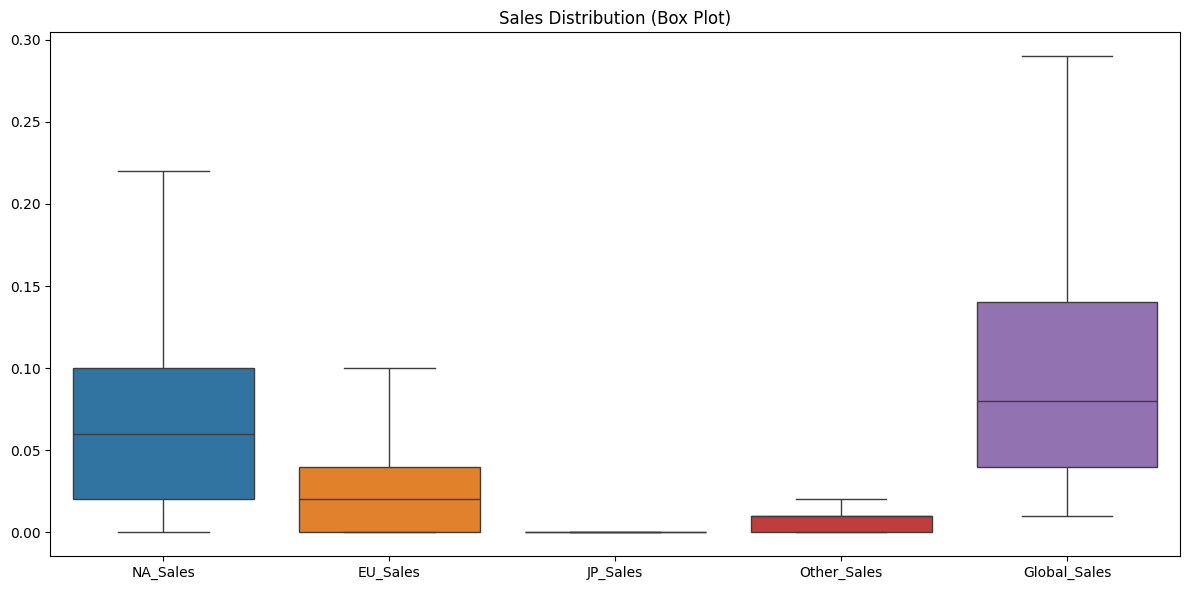

In [ ]:
# Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Sales Distribution (Box Plot)")
plt.tight_layout()
plt.show()
print('\n\n\n')

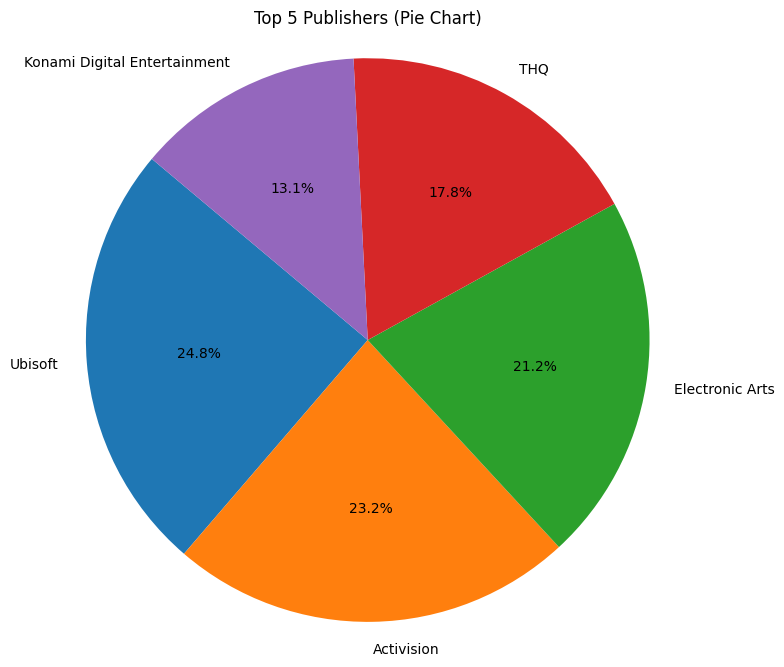

In [ ]:
# Pie Chart
plt.figure(figsize=(8,8))
top_publishers = df['Publisher'].value_counts().head(5)
plt.pie(top_publishers, labels=top_publishers.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Publishers (Pie Chart)")
plt.axis('equal')
plt.show()
print('\n\n\n')

<ipython-input-25-fe83ea57683e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Global_Sales'], shade=True, color='green')


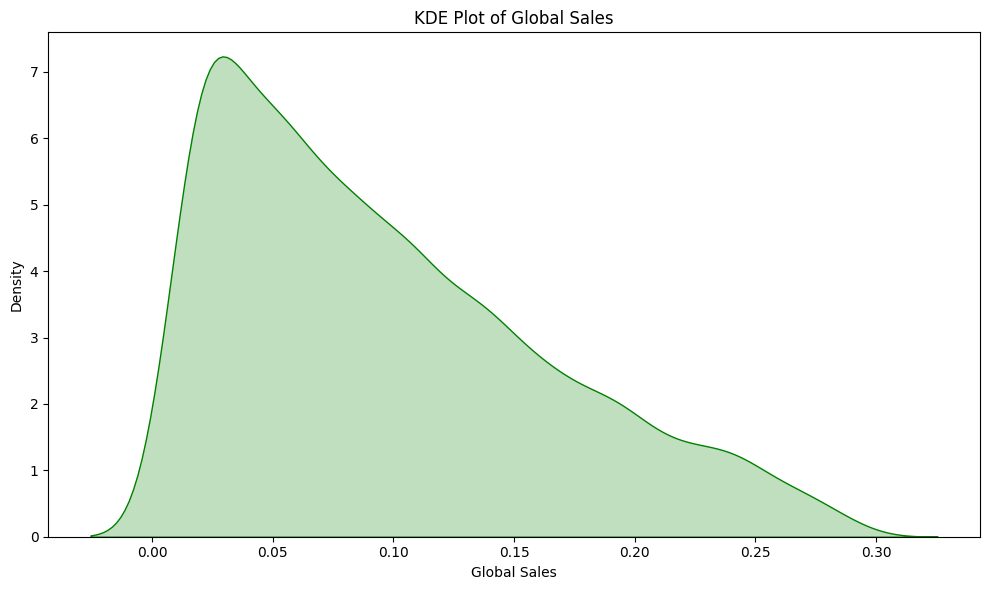

In [ ]:
# KDE
plt.figure(figsize=(10,6))
sns.kdeplot(df['Global_Sales'], shade=True, color='green')
plt.title("KDE Plot of Global Sales")
plt.xlabel("Global Sales")
plt.tight_layout()
plt.show()
print('\n\n\n')

Mean Squared Error: 2.826466925818459e-05
R² Score: 0.9941866767024665
NA_Sales: 1.0041048046048549
EU_Sales: 1.004939050582187
JP_Sales: 0.0
Other_Sales: 0.7226591142536796
Intercept: 0.002122621339757616


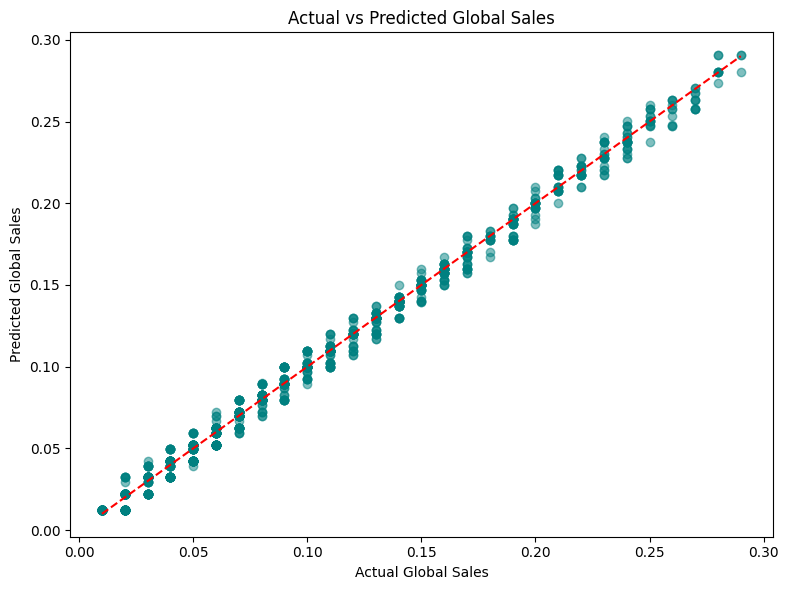

In [ ]:
# Imported necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Defined features and target
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Print feature coefficients and intercept
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model.intercept_)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Global Sales")
plt.tight_layout()
plt.show()